<a href="https://colab.research.google.com/github/MINGofHope/RL-Frozen-Leak/blob/master/Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents
- Reinforcement Learning & Markov Decision Process (MDP)
- Problem statement 
  - Environment initialization for simulation
- Project objective

- Q Learning
  - Q Tables
  - Bellman Equation
  - Exploration and Exploiration Trade off
    - Q0 - Random
    - Q1 - Greedy
    - Q2 - Greedy - Linear episolon
    - Q3 - Greedy - Exponential episolon

- Deep Q Learning (DQN)
  - Definition 
  - Significance 
  - Implementation
    - Tensorflow
    - Keras

- Performance evalution
  - Measure Metrics
    - Reward 
    - Time usage
    - Space complexity
  - Comparison between QL and DQN 
    

- References
- Acknowledgement


# Problem Statement

## Environment

In [1]:
!pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings
warnings.filterwarnings('ignore')

import gym
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 10})

In [3]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

n_ob = env.observation_space.n
n_act = env.action_space.n
print(n_ob, n_act)
# env.render()

16 4


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


# Project Objective

# Q-Learning

## Q0 - Random 

In [4]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
n0_success = 0
result = []
result_arr_0 = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result.append('Failure')
  result_arr_0.append(0)

  while not done:

    a = env.action_space.sample()

    n_s, reward, done, info = env.step(a)

    if reward:
      n0_success += 1
      result[-1] = 'Success'
      result_arr_0[-1] = reward
      break
    
  

True


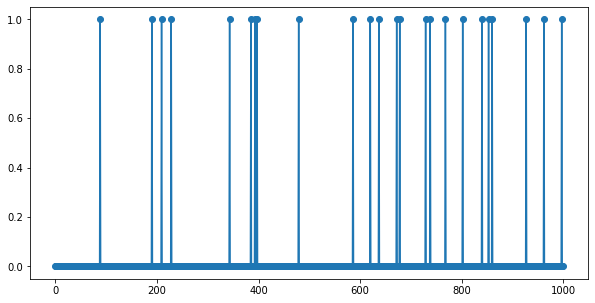

In [5]:
plt.plot(result_arr_0)
print(np.sum(result_arr_0) == n0_success)
plt.scatter(range(n_eps),result_arr_0)

## Q1 - Greedy

In [6]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
result_arr_1 = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result_arr_1.append(0) 

  while not done:

    # Use previous knowledge (exploitation) - choose action with the highest 
    # q value if applicable, otherwise random exploration  
    if np.max(q[s]) > 0:
      a = np.argmax(q[s])
    else:
      a = env.action_space.sample()

    n_s, reward, done, info = env.step(a)
    q[s, a] = q[s, a] + alpha * (reward + lambda_ * np.max(q[n_s, :]) - q[s, a])
    s = n_s

    if reward:
      result_arr_1[-1] = reward
      break 
  


814.0


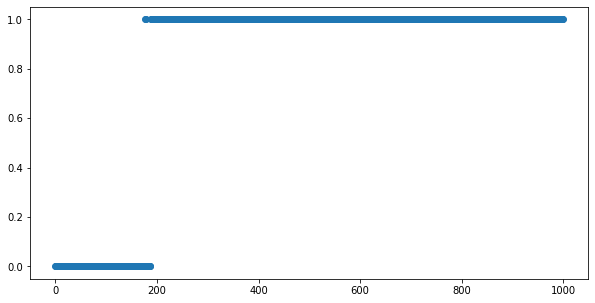

In [7]:
plt.scatter(range(n_eps),result_arr_1)
print(np.sum(result_arr_1))

## Q2 - Greedy - Linear Episolon 

In [8]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
result_arr_2 = []

epsilon = 1
epsilon_decay = 0.001
epsilon_array = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result_arr_2.append(0)
  

  while not done:

    # Exploration and explioration tradeoff with a linear epislon  
    if np.random.random() < epsilon:
      a = env.action_space.sample()
    else:
      a = np.argmax(q[s])

    n_s, reward, done, info = env.step(a)
    q[s, a] = q[s, a] + alpha * (reward + lambda_ * np.max(q[n_s, :]) - q[s, a])
    s = n_s

    if reward:
      result_arr_2[-1] = reward
      break 

  epsilon_array.append(epsilon)
  epsilon = np.max(epsilon - epsilon_decay, 0)
  

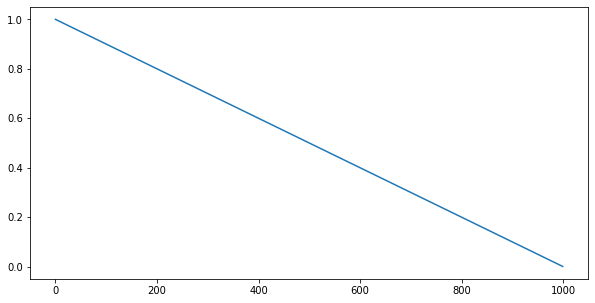

In [9]:
plt.plot(epsilon_array)

429.0
1000


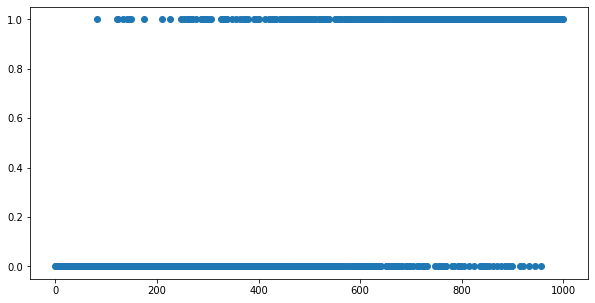

In [10]:
plt.scatter(range(n_eps),result_arr_2)
print(np.sum(result_arr_2))
print(len(result_arr_2))

## Q3 - Greedy - Exponetial Episolon

In [11]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
result_arr_3 = []

epsilon = 1.0
epsilon_decay = 0.001
epsilon_array = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result_arr_3.append(0)

  while not done:

    # Exploration and explioration tradeoff with a exponetial epislon  
    if np.random.random() < epsilon:
      a = env.action_space.sample()
    else:
      a = np.argmax(q[s])

    n_s, reward, done, info = env.step(a)
    q[s, a] = q[s, a] + alpha * (reward + lambda_ * np.max(q[n_s, :]) - q[s, a])
    s = n_s

    if reward:
      result_arr_3[-1] = reward
      break 
 
  epsilon_array.append(epsilon)
  epsilon = np.exp(-epsilon_decay * eps)

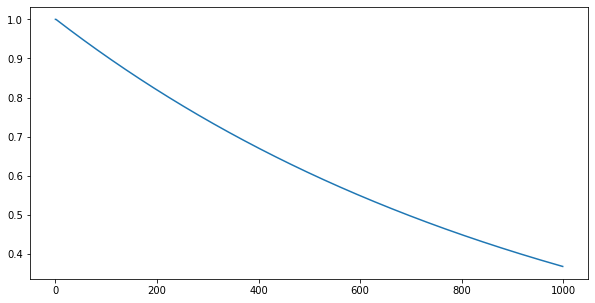

In [12]:
plt.plot(epsilon_array)

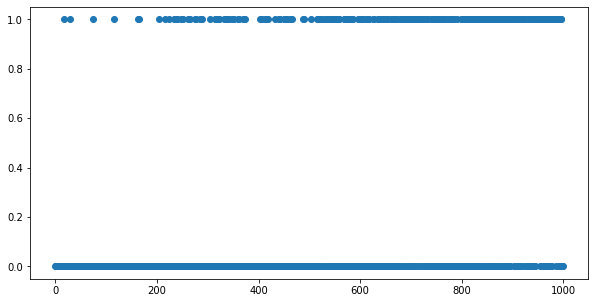

In [13]:
plt.scatter(range(n_eps),result_arr_3)

## Object-oriented Programming (OOP)


In [14]:
class Qagent:

  def __init__(self, name='FrozenLake-v1', n_episodes = 1000, learning_rate = .5, \
               discount  = .9, epsilon = 1, epsilon_decay = 0.001, method='Q1'):
    # trainning parameters
    self.n_episodes = n_episodes
    self.alpha = learning_rate
    self.lambda_ = discount
    self.epislon = epsilon
    self.epsilon_decay = epsilon_decay
    self.method = method

    # load environment
    self.env = gym.make(name, desc=None, map_name="4x4", is_slippery=False)

  def create_qt(self):
    self.state_size = self.env.observation_space.n
    self.action_size = self.env.action_space.n
    q_table = np.zeros((self.state_size, self.action_size))
    return q_table

  def reset(self):
    state = self.env.reset()
    done = False
    return state, done

  def action(self, q, state):
    # Choose anction base on method, q0, q1, q2, q3
    if self.method == 'Q0':
      action = self.env.action_space.sample()
    elif self.method == 'Q1':
      if np.max(q[state]) > 0:
        action = np.argmax([q[state]])
      else:
        action = self.env.action_space.sample()
    else:
      if np.random.random() < self.epislon:
        action = self.env.action_space.sample()
      else:
        action = np.argmax(q[state])
    return action
  
  def train(self):

    q = self.create_qt()

    self.epislon_array = []
    self.result_arr = []


    for episode in range(self.n_episodes):
      
      state, done = self.reset()

      self.result_arr.append(0)

      while not done:

        action = self.action(q, state)

        n_state, reward, done, info = self.env.step(action)

        #
        q[state, action] = q[state, action] + alpha * (reward + lambda_ * np.max(q[n_state, :]) - q[state, action])

        state = n_state

        if reward:
          self.result_arr[-1] = reward
          break 

      if self.method == 'Q3':
        self.epislon_array.append(self.epislon)
        self.epislon = np.exp(-self.epsilon_decay * episode)
      
      if self.method == 'Q2':
        self.epislon_array.append(self.epislon)
        self.epislon = max(self.epislon - self.epsilon_decay, 0)

    return self.epislon_array, self.result_arr

  def test(self):
    pass

  def visulize(self):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(self.epislon_array)
    ax1.set_xlabel('# of Eposides'); ax1.set_ylabel('Epislon')
    ax2.scatter(range(self.n_episodes), self.result_arr)
    ax2.set_xlabel('# of Eposides'); ax2.set_ylabel('Reward (Success 1, Failure 0)')

For Method Q0, Tranning accuracy(success rate) is 0.013
For Method Q1, Tranning accuracy(success rate) is 0.966
For Method Q2, Tranning accuracy(success rate) is 0.445
For Method Q3, Tranning accuracy(success rate) is 0.254


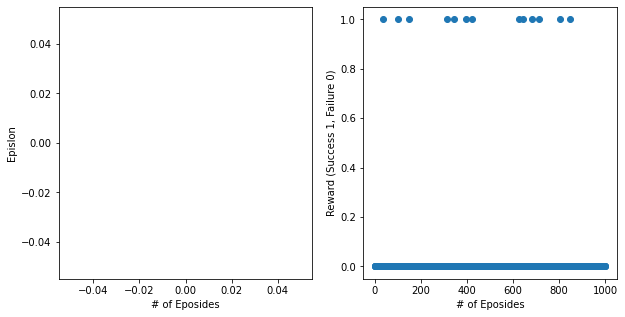

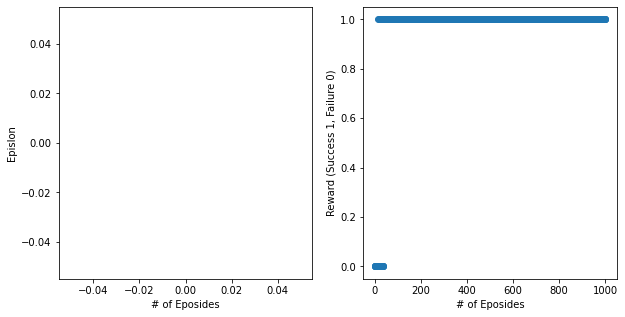

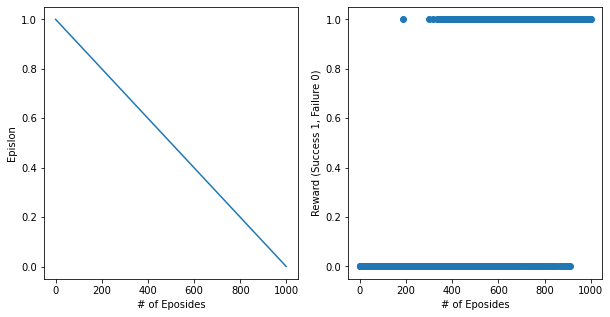

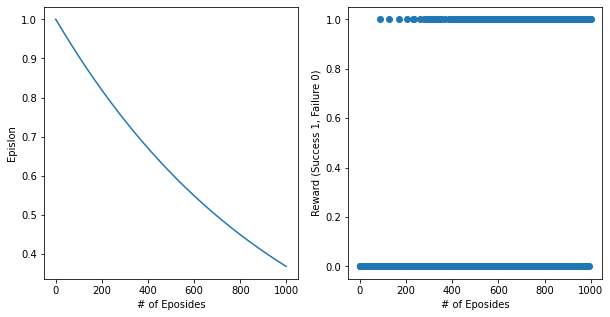

In [15]:
methods = ['Q0', 'Q1', 'Q2', 'Q3']
for m in methods:
  qAgent = Qagent(method=m) 
  _, result = qAgent.train()
  print(f'For Method {m}, Tranning accuracy(success rate) is {np.sum(result)/qAgent.n_episodes}')
  qAgent.visulize()

# When n_episodes = 2000
# For Method Q0, Tranning accuracy(success rate) is 0.013
# For Method Q1, Tranning accuracy(success rate) is 0.944
# For Method Q2, Tranning accuracy(success rate) is 0.7155
# For Method Q3, Tranning accuracy(success rate) is 0.5065

In [16]:
class Qagent:

  def __init__(self, name='FrozenLake-v1', n_episodes = 1000, learning_rate = .5, \
               discount  = .9, epsilon = 1, epsilon_decay = 0.001, method='Q1'):
    # trainning parameters
    self.n_episodes = n_episodes
    self.alpha = learning_rate
    self.lambda_ = discount
    self.epislon = epsilon
    self.epsilon_decay = epsilon_decay
    self.method = method

    # load environment
    self.env = gym.make(name, desc=None, map_name="4x4", is_slippery=False)

  def create_qt(self):
    self.state_size = self.env.observation_space.n
    self.action_size = self.env.action_space.n
    q_table = np.zeros((self.state_size, self.action_size))
    return q_table

  def reset(self):
    state = self.env.reset()
    done = False
    return state, done

  def action(self, q, state):
    # Choose anction base on method, q0, q1, q2, q3
    if self.method == 'Q0':
      action = self.env.action_space.sample()
    elif self.method == 'Q1':
      if np.max(q[state]) > 0:
        action = np.argmax([q[state]])
      else:
        action = self.env.action_space.sample()
    else:
      if np.random.random() < self.epislon:
        action = self.env.action_space.sample()
      else:
        action = np.argmax(q[state])
    return action

  def update_q(self, q, state, action, n_state, reward):
    q[state, action] = q[state, action] - \
        self.alpha * (reward + self.lambda_ * np.max(q[n_state, :]) \
                      - q[state, action])
    return q[state, action]
  
  def dynamic_epsilon(self, epislon_array, epislon, epsilon_decay, episode):
    if self.method == 'Q3':
      self.epislon_array.append(epislon)
      self.epislon = np.exp(-epsilon_decay * episode)
    
    if self.method == 'Q2':
      self.epislon_array.append(self.epislon)
      self.epislon = max(self.epislon - epsilon_decay, 0)
    return self.epislon_array

  def train(self):

    q = self.create_qt()

    self.epislon_array = []
    self.result_arr = []


    for episode in range(self.n_episodes):
      
      state, done = self.reset()

      self.result_arr.append(0)

      while not done:

        action = self.action(q, state)

        n_state, reward, done, info = self.env.step(action)

        # q[state, action] = self.update_q(q, state, action, n_state, reward)
        q[state, action] = q[state, action] + alpha * (reward + lambda_ * np.max(q[n_state, :]) - q[state, action])

        state = n_state

        if reward:
          self.result_arr[-1] = reward
          break 

      # if self.method == 'Q3':
      #   self.epislon_array.append(self.epislon)
      #   self.epislon = np.exp(-self.epsilon_decay * episode)
      
      # if self.method == 'Q2':
      #   self.epislon_array.append(self.epislon)
      #   self.epislon = max(self.epislon - self.epsilon_decay, 0)


        

      self.epislon_array = self.dynamic_epsilon(self.epislon_array, self.epislon, self.epsilon_decay, episode)


    return self.epislon_array, self.result_arr

  def test(self):
    pass

  def visulize(self):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(self.epislon_array)
    ax1.set_xlabel('# of Eposides'); ax1.set_ylabel('Epislon')
    ax2.scatter(range(self.n_episodes), self.result_arr)
    ax2.set_xlabel('# of Eposides'); ax2.set_ylabel('Reward (Success 1, Failure 0)')

In [17]:
methods = ['Q0', 'Q1', 'Q2', 'Q3']
for m in methods:
  qAgent = Qagent(method=m) 
  _, result = qAgent.train()
  print(f'For Method {m}, Tranning accuracy(success rate) is {np.sum(result)/qAgent.n_episodes}')
  qAgent.visulize()

NameError: ignored

# Deep Q Network (DQN）

## DQNK - Keras

## DQNT - Tensorflow

# Performance Evaluation

To do list:
- Logical writing & function trial, like action, step, new state display
- How to render for all eposides
- Other performance metrics
- Class for comparing different epsilon greedy optimization using time pacakage on baseline
- dqn implementation
- comparion between dqn and best q learning
- How can we ensure that all the result is reproduced


# References
- [Frozen Lake Official Documentation](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)
- [Q-learning for beginners
Train an AI to solve the Frozen Lake environment](https://mlabonne.github.io/blog/reinforcement%20learning/q-learning/frozen%20lake/gym/tutorial/2022/02/13/Q_learning.html)
- [DQN - Reinforcement Learning with Frozen Lake](https://martin-ueding.de/posts/reinforcement-learning-with-frozen-lake/)
- [Q-learning - taxi problem](https://github.com/MINGofHope/RL-Frozen-Leak/blob/master/ref_openai_gym_taxi_tutorial.ipynb)
- [DQN - taxi problem in lecture ](https://github.com/MINGofHope/RL-Frozen-Leak/blob/master/ref_DQN_Taxi_v3.ipynb)
- [Github tutorial if applicable](https://www.youtube.com/watch?v=RGOj5yH7evk)
- [Tenorflow & Keras official documentation](https://www.tensorflow.org/guide/basics)
- [DQN - Frozen Lake - Keras - Code](https://github.com/hamedmokazemi/DeepQLearning_FrozenLake_1)
- [DQN - Frozen Lake - Tensorflow ](https://www.youtube.com/watch?v=Fcmgl8ow2Uc)
- [DQN - Intro - Tensorflow - Official Documentation](https://www.tensorflow.org/agents/tutorials/0_intro_rl)
- [DQN - Carpole - Tensorflow - Official Documentation](https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial)

# Project Management
Task Split & Time Arrangement 
- Report Draft
- Q Learing implemetation & Evaluation
- DQN implementation & Evaluation   🔔 (Oct 2, flexible)



# Problems that you have faced 